# SA 2
**Applied Multivariate Data Analysis**

### PH Dataset

**Justine Aizel Samson**

# Load the Data

In [ ]:
# Load the dissimilarity matrix from the CSV file
import pandas as pd

# File path (replace with your own file path)
file_path = '/content/drive/MyDrive/CSV files/ph_cities_dissimilarity_matrix.csv'

# Load the dataset
data = pd.read_csv(file_path, index_col=0)

# Display the dataset
print("Dissimilarity Matrix:")
print(data.head())

# Check if the matrix is symmetric
if (data.values == data.values.T).all():
    print("The matrix is symmetric.")
else:
    print("Warning: The matrix is not symmetric.")

print(data.columns)


Dissimilarity Matrix:
             Manila  Cebu City  Davao City  Quezon City  Taguig  Makati  \
Manila            0        550         980           20      10      10   
Cebu City       550          0         960          570     560     550   
Davao City      980        960           0          960     950     940   
Quezon City      20        570         960            0       5       5   
Taguig           10        560         950            5       0       5   

             Iloilo City  Zamboanga City  Cagayan de Oro  Antipolo  \
Manila               710            1140             780        40   
Cebu City            130            1300             800       590   
Davao City           820             390             170      1030   
Quezon City          700            1150             770        30   
Taguig               710            1140             780        40   

             Bacolod City  Tagbilaran City  
Manila                510              740  
Cebu City       

**About the Data**

The dataset represents a dissimilarity matrix containing distances between 12 major cities in the Philippines. These values likely indicate driving distances (or other distance-based metrics) between pairs of cities, forming a square matrix. The diagonal elements are zero because the distance from a city to itself is always zero.

# Prepare the Data for MDS

In [ ]:
# Ensure the dissimilarity matrix is in the correct format
print("Shape of the matrix:", data.shape)

# Confirm that diagonal values are zero
if all(data.values.diagonal() == 0):
    print("Diagonal values are all zero, as expected.")
else:
    print("Warning: Some diagonal values are not zero.")

# Display matrix info
print("Matrix Info:")
print(data.info())


Shape of the matrix: (12, 12)
Diagonal values are all zero, as expected.
Matrix Info:
<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Manila to Tagbilaran City
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Manila           12 non-null     int64
 1   Cebu City        12 non-null     int64
 2   Davao City       12 non-null     int64
 3   Quezon City      12 non-null     int64
 4   Taguig           12 non-null     int64
 5   Makati           12 non-null     int64
 6   Iloilo City      12 non-null     int64
 7   Zamboanga City   12 non-null     int64
 8   Cagayan de Oro   12 non-null     int64
 9   Antipolo         12 non-null     int64
 10  Bacolod City     12 non-null     int64
 11  Tagbilaran City  12 non-null     int64
dtypes: int64(12)
memory usage: 1.2+ KB
None


The dissimilarity matrix for the 12 Philippine cities is correctly structured as a **12x12 square matrix** with city names as both row and column labels. The diagonal values are all zero, which confirms that the distance from a city to itself is zero, as expected in a dissimilarity matrix. Additionally, the dataset contains no missing values, and all entries are integers, making it suitable for **Multidimensional Scaling (MDS)** analysis. This ensures the data is well-prepared for visualizing and analyzing the relationships or similarities between the cities based on their pairwise distances.

# Perform Multidimensional Scaling (MDS)

In [ ]:
from sklearn.manifold import MDS

# Perform MDS with 2 dimensions
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_results = mds.fit_transform(data)

# Create a DataFrame for the results
mds_df = pd.DataFrame(mds_results, columns=['Dimension 1', 'Dimension 2'])
mds_df['City'] = data.index

# Display the first few rows of MDS results
print("MDS Results:")
print(mds_df.head())


MDS Results:
   Dimension 1  Dimension 2         City
0    81.873081   347.594643       Manila
1  -394.436062    52.180756    Cebu City
2   329.610207  -582.527544   Davao City
3    78.454603   339.173477  Quezon City
4    86.087967   339.691732       Taguig


The Multidimensional Scaling (MDS) results provide a 2D representation of the 12 Philippine cities based on their pairwise dissimilarities. In this space, cities like **Manila**, **Quezon City**, and **Taguig** appear close to each other, as reflected in their similar coordinates, indicating higher similarity or proximity. In contrast, **Cebu City** and **Davao City** are positioned further apart, suggesting greater dissimilarity or larger distances relative to the other cities. This visualization effectively captures the relative relationships between cities, allowing for an intuitive understanding of clusters and outliers.

# Interpret the Results

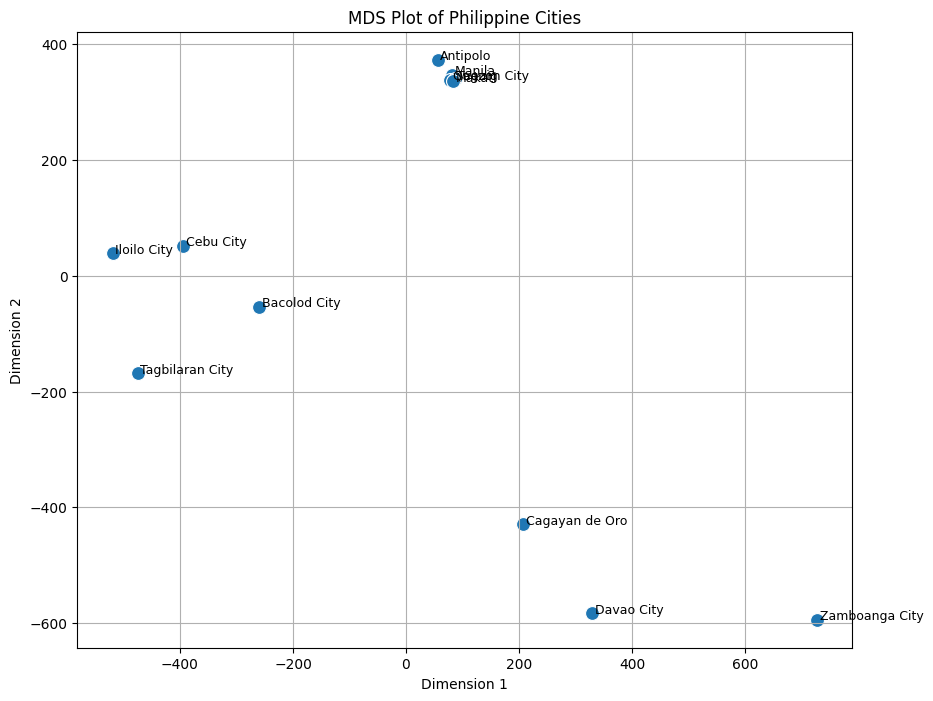

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the MDS results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=mds_df, s=100)

# Annotate city names
for i, row in mds_df.iterrows():
    plt.text(row['Dimension 1'] + 5, row['Dimension 2'], row['City'], fontsize=9)

# Add titles and labels
plt.title("MDS Plot of Philippine Cities")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()


The MDS plot of Philippine cities reveals distinct clusters and outliers based on their dissimilarities. Cities such as **Manila**, **Quezon City**, **Makati**, and **Antipolo** are positioned closely in the upper-right quadrant, indicating strong similarities or proximity. Conversely, cities like **Davao City** and **Zamboanga City** appear farthest apart from the central cluster, suggesting significant dissimilarity or geographical isolation compared to the rest. **Cagayan de Oro** and **Bacolod City** occupy intermediate positions, further highlighting variations in city relationships. This visualization effectively represents how Philippine cities are grouped based on their dissimilarity matrix, uncovering patterns that may reflect geographic distances, infrastructure, or travel-related factors.

# Check the Stress Value

In [ ]:
# Print the stress value
print(f"Stress value: {mds.stress_:.4f}")


Stress value: 225540.2533


The stress value obtained from the MDS analysis is **225540.2533**, which represents a measure of the goodness of fit for the multidimensional scaling (MDS) model. Stress quantifies the disparity between the distances in the original data and the distances in the low-dimensional representation created by MDS. Lower stress values indicate a better fit of the model to the data. In this case, the stress value is relatively high, suggesting that the MDS model may not be capturing the structure of the data effectively in the reduced dimensions. To improve the fit, consider increasing the number of dimensions, revisiting the data preprocessing steps, or exploring alternative distance metrics to better align with the data's characteristics.

## Increase Dimensions (e.g., 3D)

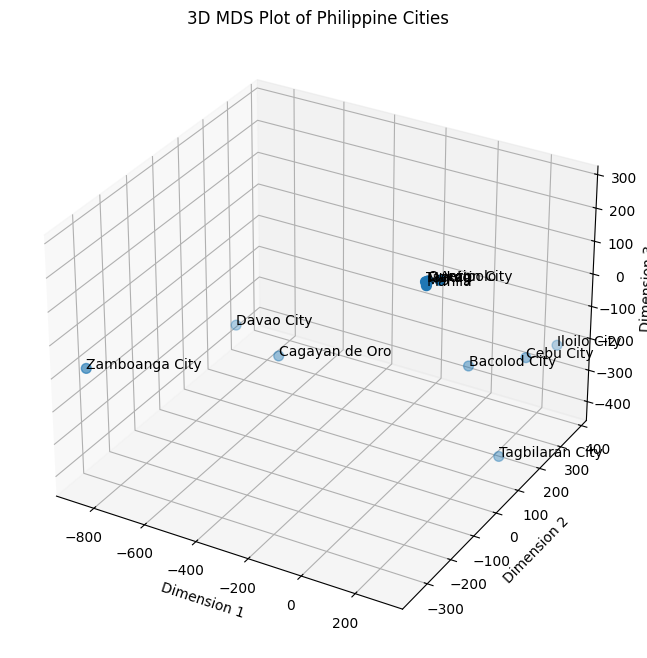

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Perform MDS with 3 dimensions
mds_3d = MDS(n_components=3, dissimilarity='precomputed', random_state=42)
mds_results_3d = mds_3d.fit_transform(data)

# Convert results to DataFrame
mds_df_3d = pd.DataFrame(mds_results_3d, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
mds_df_3d['City'] = data.index

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(mds_df_3d['Dimension 1'], mds_df_3d['Dimension 2'], mds_df_3d['Dimension 3'], s=50)

# Annotate cities
for i, row in mds_df_3d.iterrows():
    ax.text(row['Dimension 1'], row['Dimension 2'], row['Dimension 3'], row['City'])

# Labels and title
ax.set_title("3D MDS Plot of Philippine Cities")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
plt.show()


The 3D MDS plot of Philippine cities provides an additional dimension to explore the relationships between cities, potentially capturing more nuanced similarities and dissimilarities that were not as evident in the 2D plot. The cities **Manila, Makati, and Quezon City** remain closely clustered, indicating strong similarities, while cities like **Zamboanga City** and **Tagbilaran City** appear isolated, reflecting higher dissimilarity. The third dimension allows for a better spatial separation of cities such as **Davao City** and **Cagayan de Oro**, which now display more distinction in the 3D space. Compared to the 2D representation, the 3D plot may better capture the complexity of the relationships among the cities, though it comes at the cost of interpretability. Exploring alternative distance measures, such as travel time or geographical distance, could further refine the representation and provide additional insights into the clustering behavior of the cities.

# Communicate Findings


**a. Present the MDS plots:**  

The 2D and 3D MDS plots provide visual representations of the dissimilarity matrix, showing how Philippine cities are grouped based on their similarities. In both plots, clusters of cities and isolated points highlight the relationships and differences among the cities. The 2D plot effectively captures an overall spatial distribution of the cities, while the 3D plot adds an additional dimension to reveal subtle patterns that might not be as apparent in 2D.  

**b. Interpret the Plot:**  

The cities **Manila, Makati, and Quezon City** are tightly clustered in both plots, suggesting they are highly similar, likely due to shared urban and economic characteristics as part of Metro Manila. Similarly, **Cebu City** and **Iloilo City** are relatively close to each other, indicating a degree of similarity, possibly regional or cultural. On the other hand, cities such as **Zamboanga City** and **Tagbilaran City** are positioned far from the central clusters, suggesting they are distinct or dissimilar from the rest of the cities. **Davao City** and **Cagayan de Oro** occupy more isolated positions, particularly in the 3D plot, further emphasizing their distinctiveness.  

**c. Discuss Potential Factors:**  

The observed patterns can be attributed to several factors. Geographic proximity likely explains why cities within Metro Manila (Manila, Makati, Quezon City) are closely grouped—they share similar urban infrastructure, economic activities, and development levels. Similarly, **Cebu City** and **Iloilo City**, both located in the Visayas region, may reflect cultural and regional similarities. The cities that appear isolated, such as **Zamboanga City** and **Davao City**, are geographically farther from the central urban areas and may have unique regional characteristics, such as cultural diversity, economic activities, or historical influences. Differences in infrastructure, population density, and development levels could also contribute to the dissimilarities observed in the plots.  



---



In summary, the MDS plots reveal patterns of similarity among cities that can be linked to geographic, cultural, and historical factors, while also highlighting cities that are distinctly different in the analyzed dimensions.

In [13]:
import warnings
from pandas.errors import PerformanceWarning  # Use this if PerformanceWarning needs to be suppressed
from statsmodels.tools.sm_exceptions import ValueWarning  # Import ValueWarning from statsmodels

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)   # General warnings
warnings.filterwarnings("ignore", category=FutureWarning) # FutureWarning from statsmodels
warnings.filterwarnings("ignore", category=ValueWarning)  # ValueWarning for unsupported index
warnings.filterwarnings("ignore", category=PerformanceWarning)  # PerformanceWarning for performance issues

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/SA2_n2_Samson_AMDA.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/SA2_n2_Samson_AMDA.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 523724 bytes to /content/drive/My Drive/Colab Notebooks/SA2_n2_Samson_AMDA.html
